In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
ANNOTATIONS_CSV = os.path.join("dataset", "Iris.xls")

### 1. Loading dataset

In [3]:
df = pd.read_excel(ANNOTATIONS_CSV)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Data-preprocessing (Explore Data Analysis - EDA)

In [4]:
num_samples = df.shape[0]
num_features = df.shape[1]

print(f"num_samples = {num_samples}")
print(f"num_features = {num_features}")

num_samples = 150
num_features = 5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_class = {"Iris-setosa":1, 
              "Iris-versicolor":2, 
              "Iris-virginica":3}
df["specis_iris"] = [iris_class[i] for i in df["iris"]]
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,specis_iris
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


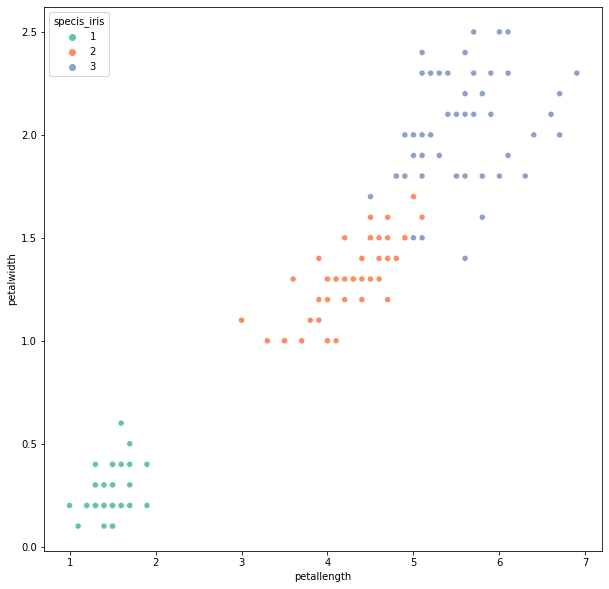

In [9]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "petallength", y = "petalwidth", hue = "specis_iris",
                palette = "Set2")
plt.show()

In [13]:
# choose 4 feature to be independent variable
X = df.drop(["iris", "specis_iris"], axis = 1).values # axis = 1 to select column
y = df[["specis_iris"]].values

In [14]:
VAL_RATIO = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = VAL_RATIO, random_state = SEED)

### 3. Create model

In [15]:
model = LogisticRegression(verbose = 1)

### 4. Training model

In [16]:
model.fit(X_train, y_train)

print(f"DONE")

DONE


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### 5. Evaluating model

In [21]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : y_val.squeeze(1),
                            "Predicted" : y_hat})
performance.head()

,Actual,Predicted
0,2,2
1,1,1
2,3,3
3,2,2
4,2,2


In [22]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.97
acc_val = 1.00


In [26]:
y_hat = model.predict(X_val)
y_hat_proba = model.predict_proba(X_val)

performance = pd.DataFrame({"Actual" : y_val.squeeze(1),
                            "Predicted" : y_hat, 
                            "Predicted_class_1" : y_hat_proba[:, 0],
                            "Predicted_class_2" : y_hat_proba[:, 1],
                            "Predicted_class_3" : y_hat_proba[:, 1]})
performance.head()

,Actual,Predicted,Predicted_class_1,Predicted_class_2,Predicted_class_3
0,2,2,3.769989e-03,0.826991,0.826991
1,1,1,9.471682e-01,0.052832,0.052832
2,3,3,8.512325e-09,0.001558,0.001558
3,2,2,6.377762e-03,0.792130,0.792130
4,2,2,1.431257e-03,0.774090,0.774090


In [32]:
# confusion matrix in validation 
confusion_matrix_val = confusion_matrix(y_val, model.predict(X_val))

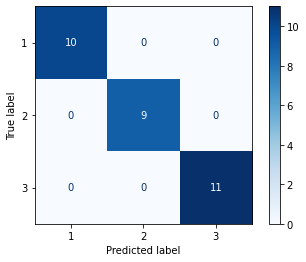

In [40]:
plot_confusion_matrix(model, X_val, y_val, cmap = 'Blues')

In [37]:
acc_val = confusion_matrix_val.diagonal().sum() /  confusion_matrix_val.sum()
print(f"acc_val = {acc_val:.2f}")

acc_val = 1.00
